Problem 1: Data from yfinance
Using the yfinance Python package, write a function called get_data() that downloads all hourly data for the previous five days for the five FAANG stocks:

Facebook (META) / Apple (AAPL) / Amazon (AMZN) / Netflix (NFLX)/ Google (GOOG)

The function should save the data into a folder called data in the root of your repository using a filename with the format YYYYMMDD-HHmmss.csv where YYYYMMDD is the four-digit year (e.g. 2025), followed by the two-digit month (e.g. 09 for September), followed by the two digit day, and HHmmss is hour, minutes, seconds. Create the data folder if you don't already have one.

In [44]:

# https://pypi.org/project/yfinance/

import yfinance as yf  # import the yfinance library to be able to fetch data for the five FAANG stocks.
import os  # import the os library to handle file system operations.
from datetime import datetime # import datetime to generate timestamps for the filenames.


def get_data():    #  Creation of the function get_data():

    stocks_list = ['META', 'AAPL', 'AMZN', 'NFLX', 'GOOGL'] # Creation of the List of FAANG stock tickers
    
    if not os.path.exists('data'):  # Creates the 'data' folder if it does not exist
           os.makedirs('data')

    for stock in stocks_list: # Loop needed to generate individual files for each stock
         df = yf.download (tickers = stock, period ='5d', interval= '1h' , auto_adjust=False)  # Download hourly data for the last 5 days 
         timestamp = datetime.now().strftime ("%Y%m%d_%H%M%S")  # Get the current timestamp
         df.to_csv(f"data/{stock}_{timestamp}.csv")  # Save the data to a CSV file with the stock ticker and timestamp in the filename
         
    return "Download complete."

results = get_data()   # Call the function to get the stock data
print(results)  # Print the results

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Download complete.


Problem 2: Plotting Data
Write a function called plot_data() that opens the latest data file in the data folder and, on one plot, plots the Close prices for each of the five stocks. The plot should include axis labels, a legend, and the date as a title. The function should save the plot into a plots folder in the root of your repository using a filename in the format YYYYMMDD-HHmmss.png. Create the plots folder if you don't already have one.

1-Criar uma função chamada plot_data().
Abrir o arquivo mais recente dentro da pasta data/.
Procurar todos os arquivos da pasta.
Identificar qual foi o último modificado.
Ler os dados do arquivo (CSV ou outro formato tabular).
O arquivo contém preços de fechamento (“Close prices”) de cinco ações.

2- Plotar todos os preços de fechamento em um único gráfico.
Cada ação deve ter sua própria linha.
Adicionar elementos no gráfico:
Rótulo do eixo X (ex.: Date).
Rótulo do eixo Y (ex.: Close Price).
Legenda (para diferenciar as ações).
Título do gráfico (incluir a data atual).

3- Criar a pasta plots/ se ainda não existir.
Salvar o gráfico na pasta plots/ com o nome no formato YYYYMMDD-HHmmss.png.
Mostrar o gráfico na tela (usando plt.show() ou equivalente).

Arquivo carregado: C:\Users\Julia Cruz\8645-computer-infrastructure\data\GOOGL_20251114_121704.csv

Primeiras linhas do CSV:


,Price,Adj Close,Close,High,Low,Open,Volume
0,Ticker,GOOGL,GOOGL,GOOGL,GOOGL,GOOGL,GOOGL
1,Datetime,NaN,NaN,NaN,NaN,NaN,NaN
2,2025-11-07 14:30:00+00:00,278.2449951171875,278.2449951171875,283.7799987792969,275.739990234375,283.1300048828125,6456199
3,2025-11-07 15:30:00+00:00,276.614990234375,276.614990234375,278.5799865722656,275.8599853515625,278.239990234375,3191782
4,2025-11-07 16:30:00+00:00,277.2550048828125,277.2550048828125,277.6907958984375,275.19000244140625,276.6199951171875,2652498



Resumo estatístico:


,Price,Adj Close,Close,High,Low,Open,Volume
count,37,36,36,36,36,36,36
unique,37,36,36,36,36,36,36
top,Ticker,GOOGL,GOOGL,GOOGL,GOOGL,GOOGL,GOOGL
freq,1,1,1,1,1,1,1


TypeError: 'value' must be an instance of str or bytes, not a float

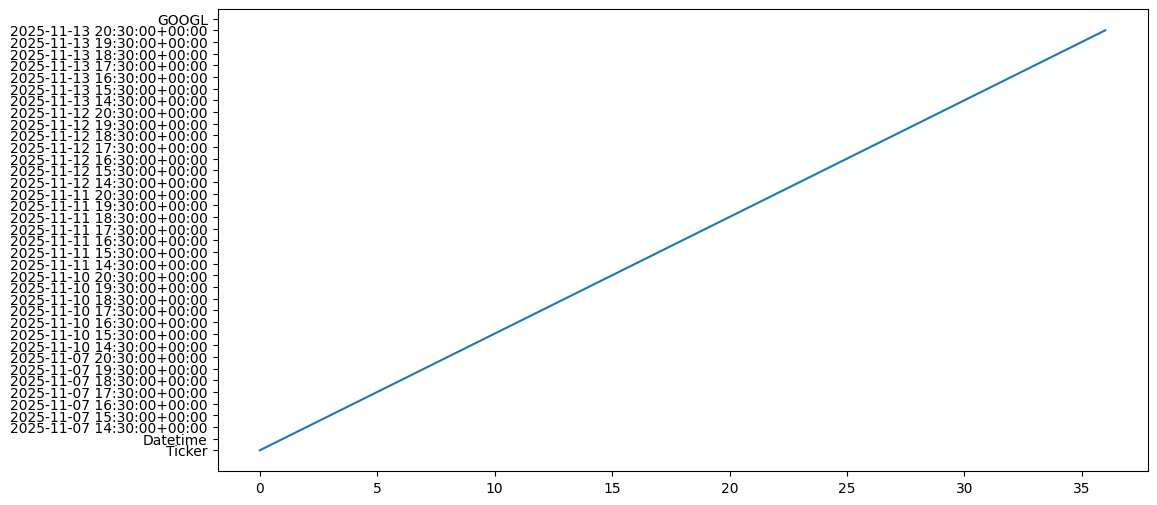

In [64]:
%matplotlib inline
import os
import pandas as pd
import matplotlib.pyplot as plt

def plot_data():
    data_folder = r"C:\Users\Julia Cruz\8645-computer-infrastructure\data"

    # Verifica se a pasta existe
    if not os.path.exists(data_folder):
        print(f"Pasta não encontrada: {data_folder}")
        return

    # Lista arquivos CSV
    files = [f for f in os.listdir(data_folder) if f.endswith('.csv')]
    if not files:
        print("Nenhum arquivo CSV na pasta de dados")
        return

    # Pega o arquivo mais recente
    files.sort(key=lambda x: os.path.getmtime(os.path.join(data_folder, x)), reverse=True)
    latest_file = os.path.join(data_folder, files[0])

    # Lê o CSV
    df = pd.read_csv(latest_file)

    # Mostra informações
    print(f"Arquivo carregado: {latest_file}\n")
    print("Primeiras linhas do CSV:")
    display(df.head())
    print("\nResumo estatístico:")
    display(df.describe())

    # Detecta coluna de datas
    date_cols = [c for c in df.columns if 'date' in c.lower() or 'data' in c.lower()]
    if date_cols:
        x_values = pd.to_datetime(df[date_cols[0]], errors='coerce')
        df_plot = df.drop(columns=[date_cols[0]])
        x_label = date_cols[0]
    else:
        x_values = range(len(df))
        df_plot = df
        x_label = "Index"

    # Plota todas as colunas restantes
    plt.figure(figsize=(12,6))
    for column in df_plot.columns:
        plt.plot(x_values, df_plot[column], label=column)
    plt.title("Dados do arquivo mais recente")
    plt.xlabel(x_label)
    plt.ylabel("Valor")
    plt.grid(True)
    plt.legend()
    plt.show()

plot_data()
